# DEFINITION OF FUNCTIONS

In [2]:
# Functions to save and load variables/data

def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)

def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [3]:
def lambert_map(cbar_levels, X, Y, data, title, title_colorbar, cmap, path_save, title_save):
        '''
        Function for plotting a lambert projection map.
        
        Args : 
        cbar_levels, X, Y, data, title, title_colorbar, path_save, title_save
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        from mpl_toolkits.basemap import Basemap
        
        v       = cbar_levels
        fig     = plt.figure(figsize=(8,8))
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm, ym  = m(X, Y)
        im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

        cbar = m.colorbar(im,pad='10%')
        cbar.set_label(title_colorbar, fontsize =16)

        m.fillcontinents(color='0.5', lake_color='0.5')
        m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
        m.drawcoastlines()



        plt.title(title, fontsize=18)
        plt.savefig(path_save + title_save, bbox_inches='tight')

***

# PACKAGES

In [2]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

***

# Potential temperature

In [5]:
# Load variables
mean_Theta_surf = pickle_load('mean_Theta_surf', '/data/ebent')
mean_Theta_30 = pickle_load('mean_Theta_30', '/data/ebent')
mean_Theta_100 = pickle_load('mean_Theta_100', '/data/ebent')
mean_Theta_200 = pickle_load('mean_Theta_200', '/data/ebent')
mean_Theta_500 = pickle_load('mean_Theta_500', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Theta_surf.npy')
('loaded from : ', '/data/ebent/mean_Theta_30.npy')
('loaded from : ', '/data/ebent/mean_Theta_100.npy')
('loaded from : ', '/data/ebent/mean_Theta_200.npy')
('loaded from : ', '/data/ebent/mean_Theta_500.npy')


In [6]:
# Load packages
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
file2 = netCDF4.Dataset(load_path2+'so12_i0_year2007_5day_Theta.nc','r')
file3 = netCDF4.Dataset(load_path2+'so12_i0_year2008_5day_Theta.nc','r')
file4 = netCDF4.Dataset(load_path2+'so12_i0_year2009_5day_Theta.nc','r')
file5 = netCDF4.Dataset(load_path2+'so12_i0_year2010_5day_Theta.nc','r')
file6 = netCDF4.Dataset(load_path2+'so12_i0_year2011_5day_Theta.nc','r')

In [7]:
file1.variables.keys()

[u'time', u'lat', u'lon', u'depth', u'Theta']

In [8]:
# Select a specific region
lon_min = 1950
lon_max = 2520
lat_min = 0
lat_max = 541

In [9]:
lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat) 

In [10]:
depth = file1.variables['depth'][:]
surf = depth[0]
depth_100 = depth[24]
depth_200 = depth[39]
print(surf, depth_100, depth_200)

(1.0, 102.5, 205.0)


In [11]:
lon = file1.variables['lon'][:]

In [12]:
lon[1950], lon[2520]

(162.54167175292969, 210.04167175292969)

In [ ]:
index_DJF = np.append(np.arange(12), np.arange(67,73))
index_JJA = np.arange(30,49)

## Surface

In [10]:
mean_Theta_surf= (np.ma.mean(file1.variables['Theta'][19:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [14]:
print(mean_Theta_surf.min(), mean_Theta_surf.max(), np.mean(mean_Theta_surf))

(-1.9383443495950896, 0.89315533731433661, -1.6967072234102878)


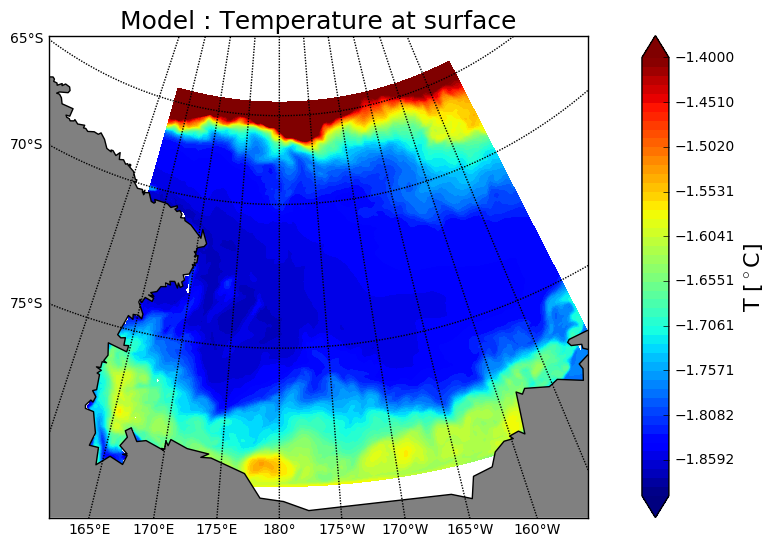

In [16]:
lambert_map(np.linspace(-1.9,-1.4,50), Lon, Lat, mean_Theta_surf, 'Model : Temperature at surface', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'thetasurf_jup.png')

## 30 m

In [9]:
mean_Theta_30= (np.ma.mean(file1.variables['Theta'][19:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [17]:
print(mean_Theta_30.min(), mean_Theta_30.max(), np.mean(mean_Theta_30))

(-1.93924653312387, 1.1331439419880809, -1.6413679531269438)


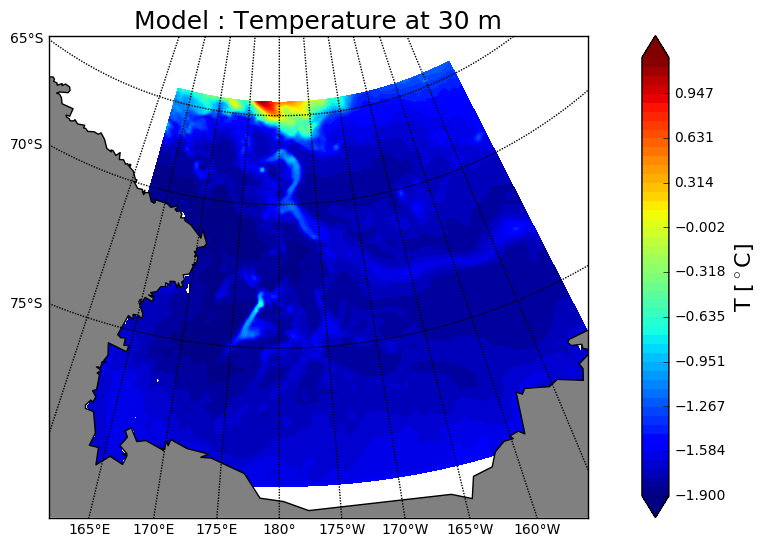

In [18]:
lambert_map(np.linspace(-1.9,1.2,50), Lon, Lat, mean_Theta_30, 'Model : Temperature at 30 m', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'theta30_jup.png')

## 100 m deep

In [50]:
mean_Theta_100= (np.ma.mean(file1.variables['Theta'][19:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [19]:
print(mean_Theta_100.min(), mean_Theta_100.max(), np.mean(mean_Theta_100))

(-1.9161330235356491, 1.6029821098450576, -0.16047908277497352)


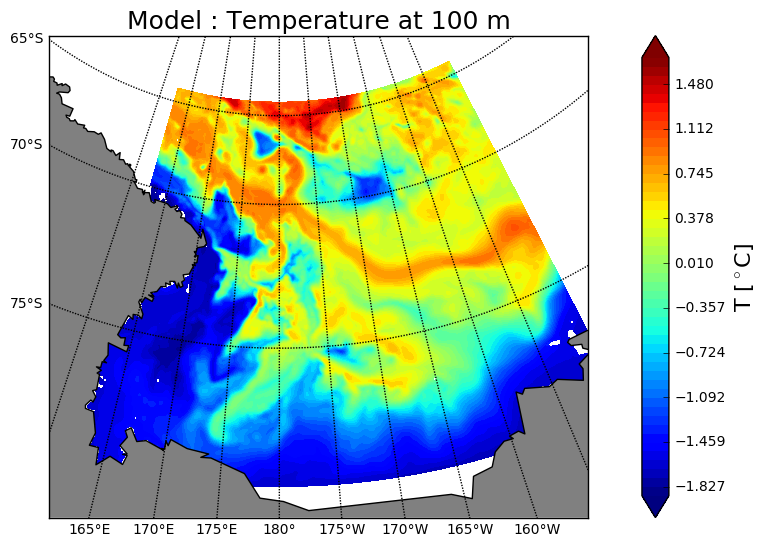

In [20]:
lambert_map(np.linspace(-1.9,1.7,50), Lon, Lat, mean_Theta_100, 'Model : Temperature at 100 m', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'theta1_jup.png')

## 200 m deep

In [7]:
mean_Theta_200= (np.ma.mean(file1.variables['Theta'][19:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [57]:
pickle_save('mean_Theta_surf', '/data/ebent', mean_Theta_surf)
pickle_save('mean_Theta_100', '/data/ebent', mean_Theta_100)
pickle_save('mean_Theta_200', '/data/ebent', mean_Theta_200)

('saved at : ', '/data/ebent/mean_Theta_surf.npy')
('saved at : ', '/data/ebent/mean_Theta_100.npy')
('saved at : ', '/data/ebent/mean_Theta_200.npy')


In [21]:
print(mean_Theta_200.min(), mean_Theta_200.max(), np.mean(mean_Theta_200))

(-1.9026828190406606, 2.2414232017498996, 0.77460518471744333)


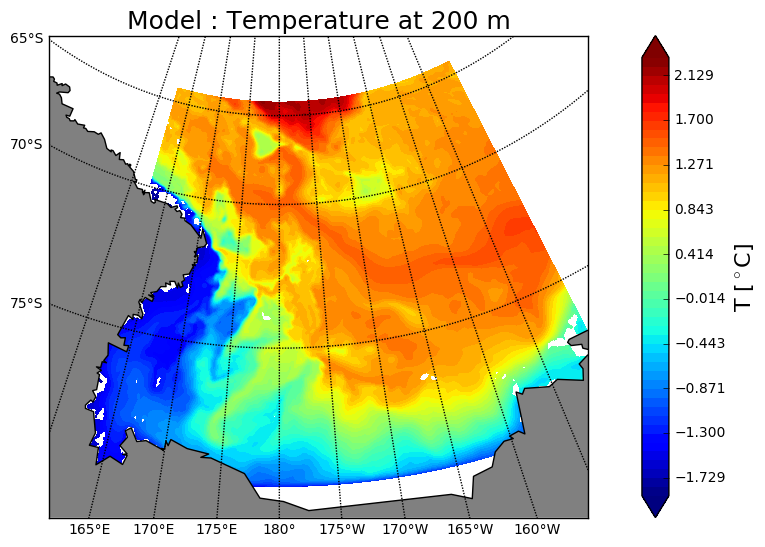

In [22]:
lambert_map(np.linspace(-1.9,2.3,50), Lon, Lat, mean_Theta_200, 'Model : Temperature at 200 m', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'theta2_jup.png')

## 500 m

In [10]:
mean_Theta_500= (np.ma.mean(file1.variables['Theta'][19:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [11]:
pickle_save('mean_Theta_30', '/data/ebent', mean_Theta_30)
pickle_save('mean_Theta_500', '/data/ebent', mean_Theta_500)

('saved at : ', '/data/ebent/mean_Theta_30.npy')
('saved at : ', '/data/ebent/mean_Theta_500.npy')


In [23]:
print(mean_Theta_500.min(), mean_Theta_500.max(), np.mean(mean_Theta_500))

(-1.910933545980704, 2.2637206169029214, 1.0449427004625282)


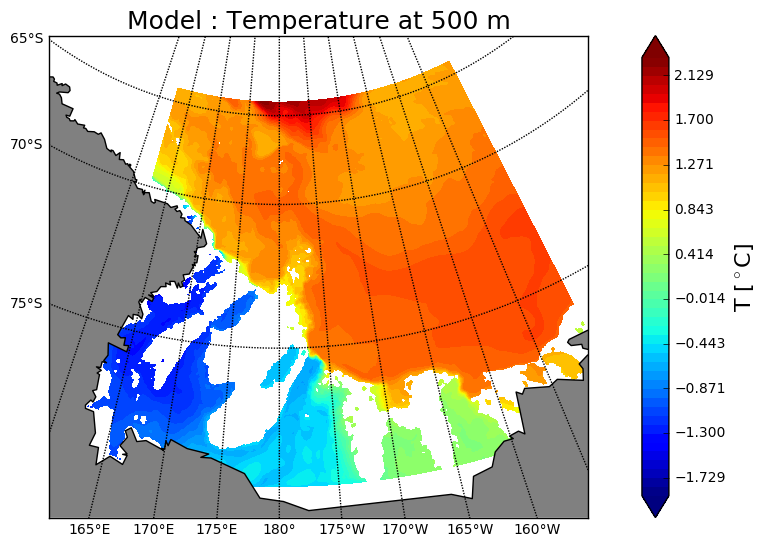

In [24]:
lambert_map(np.linspace(-1.9,2.3,50), Lon, Lat, mean_Theta_500, 'Model : Temperature at 500 m', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'theta500_jup.png')